# Moment Imputation Example

## Loading Moment Model

In [ ]:
import os
import sys
import numpy as np

src_path = os.path.abspath(os.path.join("..", "src"))
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from samay.model import MomentModel
from samay.dataset import MomentDataset
from samay.utils import load_args

repo = "AutonLab/MOMENT-1-large"
config = {
    "task_name": "reconstruction",
}
mmt = MomentModel(config=config, repo=repo)

Loading MOMENT model from AutonLab/MOMENT-1-large


## Zero-Shot Imputation Using Moment Model

In [ ]:
train_dataset = MomentDataset(
    name="ett",
    datetime_col="date",
    path="../data/data/ETTh1.csv",
    mode="train",
    task_name="imputation",
)
test_dataset = MomentDataset(
    name="ett",
    datetime_col="date",
    path="../data/data/ETTh1.csv",
    mode="test",
    task_name="imputation",
)
# print(len(train_dataset))
# print(len(test_dataset))
# trues, preds, masks = mmt.evaluate(test_dataset, task_name='imputation')

## Visualization of Zero-Shot Imputation

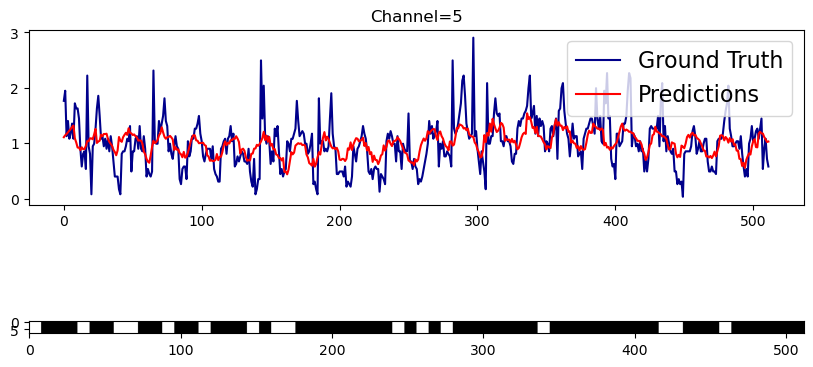

In [ ]:
# import matplotlib.pyplot as plt

# print(trues.shape, preds.shape, masks.shape)

# mse = np.mean((trues[masks==0] - preds[masks==0])**2)
# mae = np.mean(np.abs(trues[masks==0] - preds[masks==0]))
# print(f'MSE: {mse}, MAE: {mae}')

# idx = np.random.randint(trues.shape[0])
# channel_idx = np.random.randint(trues.shape[1])

# fig, axs = plt.subplots(2, 1, figsize=(10, 5))
# axs[0].set_title(f"Channel={channel_idx}")
# axs[0].plot(trues[idx, channel_idx, :].squeeze(), label='Ground Truth', c='darkblue')
# axs[0].plot(preds[idx, channel_idx, :].squeeze(), label='Predictions', c='red')
# axs[0].legend(fontsize=16)

# axs[1].imshow(np.tile(masks[np.newaxis, idx, channel_idx], reps=(8, 1)), cmap='binary')
# plt.show()
mmt.plot(test_dataset, task_name="imputation")

## Finetune the Moment Model for Imputation

In [ ]:
fintuned_model = mmt.finetune(train_dataset, task_name="imputation")

/nethome/sli999/anaconda3/envs/torch/lib/python3.11/site-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Epoch 0: Train loss: 0.262
Epoch 1: Train loss: 0.259
Epoch 2: Train loss: 0.256
Epoch 3: Train loss: 0.253
Epoch 4: Train loss: 0.249


## Evaluate the finetuned model and visualization

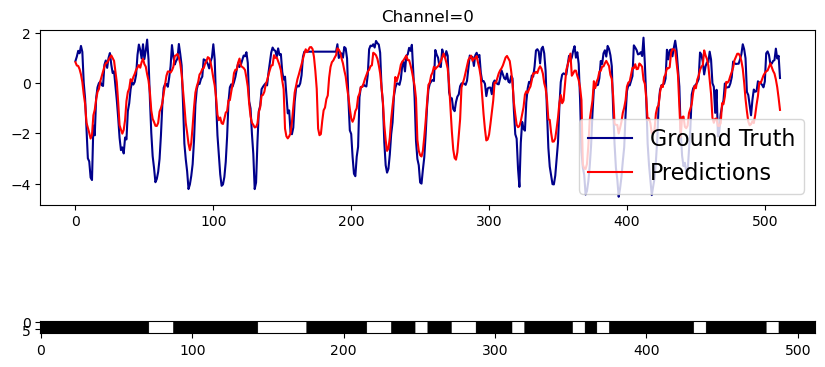

In [ ]:
# trues, preds, masks = mmt.evaluate(test_dataset, task_name='imputation')
# mse = np.mean((trues[masks==0] - preds[masks==0])**2)
# mae = np.mean(np.abs(trues[masks==0] - preds[masks==0]))
# print(f'MSE: {mse}, MAE: {mae}')

# idx = np.random.randint(trues.shape[0])
# channel_idx = np.random.randint(trues.shape[1])

# fig, axs = plt.subplots(2, 1, figsize=(10, 5))
# axs[0].set_title(f"Channel={channel_idx}")
# axs[0].plot(trues[idx, channel_idx, :].squeeze(), label='Ground Truth', c='darkblue')
# axs[0].plot(preds[idx, channel_idx, :].squeeze(), label='Predictions', c='red')
# axs[0].legend(fontsize=16)

# axs[1].imshow(np.tile(masks[np.newaxis, idx, channel_idx], reps=(8, 1)), cmap='binary')
# plt.show()
mmt.plot(test_dataset, task_name="imputation")